Impo

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [18]:
column_names = ['engine_id', 'cycle'] + \
                [f'op_setting{i}' for i in range(1, 4)] + \
                [f'sensor{i}' for i in range(1, 22)]

In [48]:
from google.colab import files
uploaded = files.upload()

Saving train_FD001.txt to train_FD001 (2).txt


In [49]:
df = pd.read_csv('/content/train_FD001.txt', sep=' ', header=None, names=column_names)

In [50]:
df

engine_id   cycle  op_setting1  op_setting2  ...  sensor18  sensor19  sensor20  sensor21
1   1      -0.0007 -0.0004        100.0       518.67  ...     39.06   23.4190       NaN       NaN
    2       0.0019 -0.0003        100.0       518.67  ...     39.00   23.4236       NaN       NaN
    3      -0.0043  0.0003        100.0       518.67  ...     38.95   23.3442       NaN       NaN
    4       0.0007  0.0000        100.0       518.67  ...     38.88   23.3739       NaN       NaN
    5      -0.0019 -0.0002        100.0       518.67  ...     38.90   23.4044       NaN       NaN
...            ...     ...          ...          ...  ...       ...       ...       ...       ...
100 196    -0.0004 -0.0003        100.0       518.67  ...     38.49   22.9735       NaN       NaN
    197    -0.0016 -0.0005        100.0       518.67  ...     38.30   23.1594       NaN       NaN
    198     0.0004  0.0000        100.0       518.67  ...     38.44   22.9333       NaN       NaN
    199    -0.0011  0.0003        100.0       518.67  ...     38.29   23.0640       NaN       NaN
    200    -0.0032 -0.0005        100.0       518.67  ...     38.37   23.0522       NaN       NaN

[20631 rows x 26 columns]

In [51]:
df.isnull().sum()

,0
engine_id,0
cycle,0
op_setting1,0
op_setting2,0
op_setting3,0
sensor1,0
sensor2,0
sensor3,0
sensor4,0
sensor5,0


In [52]:
df.dropna(axis = 1, how = 'all', inplace = True)

In [53]:
df

engine_id   cycle  op_setting1  op_setting2  ...  sensor16  sensor17  sensor18  sensor19
1   1      -0.0007 -0.0004        100.0       518.67  ...      2388     100.0     39.06   23.4190
    2       0.0019 -0.0003        100.0       518.67  ...      2388     100.0     39.00   23.4236
    3      -0.0043  0.0003        100.0       518.67  ...      2388     100.0     38.95   23.3442
    4       0.0007  0.0000        100.0       518.67  ...      2388     100.0     38.88   23.3739
    5      -0.0019 -0.0002        100.0       518.67  ...      2388     100.0     38.90   23.4044
...            ...     ...          ...          ...  ...       ...       ...       ...       ...
100 196    -0.0004 -0.0003        100.0       518.67  ...      2388     100.0     38.49   22.9735
    197    -0.0016 -0.0005        100.0       518.67  ...      2388     100.0     38.30   23.1594
    198     0.0004  0.0000        100.0       518.67  ...      2388     100.0     38.44   22.9333
    199    -0.0011  0.0003        100.0       518.67  ...      2388     100.0     38.29   23.0640
    200    -0.0032 -0.0005        100.0       518.67  ...      2388     100.0     38.37   23.0522

[20631 rows x 24 columns]

In [54]:
rul_df = df.groupby('engine_id')['cycle'].max().reset_index()
rul_df.columns = ['engine_id', 'max_cycle']
df = df.merge(rul_df, on='engine_id')
df['RUL'] = df['max_cycle'] - df['cycle']
df.drop('max_cycle', axis=1, inplace=True)

In [55]:
df

,engine_id,cycle,op_setting1,op_setting2,op_setting3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,RUL
0,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,0.0010
1,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,0.0009
2,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,0.0002
3,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,0.0005
4,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,0.0007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,551.43,2388.19,9065.52,1.3,48.07,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,0.0008
20627,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,550.86,2388.23,9065.11,1.3,48.04,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,0.0010
20628,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,550.94,2388.24,9065.90,1.3,48.09,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,0.0006
20629,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,550.68,2388.25,9073.72,1.3,48.39,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,0.0003


In [57]:
selected_features = ['sensor2', 'sensor6', 'sensor7', 'sensor9',
                     'sensor10', 'sensor11', 'sensor12', 'sensor13',
                     'sensor18', 'sensor19']

In [76]:
features = df[selected_features]
target = df['RUL']

In [78]:
features

,sensor2,sensor6,sensor7,sensor9,sensor10,sensor11,sensor12,sensor13,sensor18,sensor19
0,1400.60,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,39.06,23.4190
1,1403.14,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,39.00,23.4236
2,1404.20,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,38.95,23.3442
3,1401.87,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,38.88,23.3739
4,1406.22,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...
20626,1428.63,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,38.49,22.9735
20627,1433.58,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,38.30,23.1594
20628,1428.18,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,38.44,22.9333
20629,1426.53,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,38.29,23.0640


In [79]:
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

In [63]:
x_train, x_test, y_train, y_test = train_test_split(
    features_scaled, target, test_size=0.2, random_state=42)

In [64]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [69]:
preds = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print(f'RMSE: {rmse:.2f}')

RMSE: 0.00


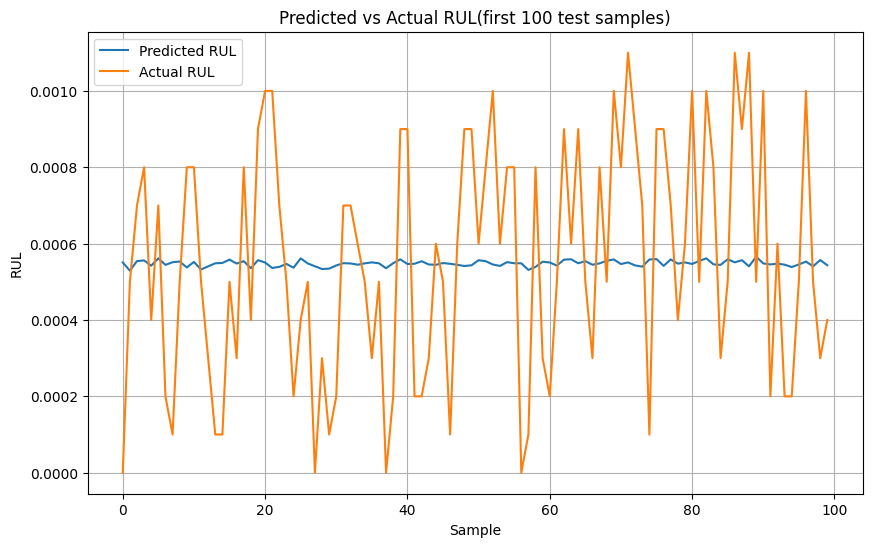

In [77]:
plt.figure(figsize=(10, 6))
x = np.arange(100)
plt.plot(x, preds[:100], label='Predicted RUL')
plt.plot(x, y_test[:100], label='Actual RUL')
plt.title('Predicted vs Actual RUL(first 100 test samples)')
plt.xlabel('Sample')
plt.ylabel('RUL')
plt.legend()
plt.grid(True)
plt.show()